In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

In [6]:
# Split dataset on train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train_MinMaxScaled = min_max.fit_transform(X_train)
X_test_MinMaxScaled = min_max.transform(X_test)

## Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_StandardScaler = std.fit_transform(X_train)
X_test_StandardScaler = std.transform(X_test)

# Imperio

## Box-Cox Transformer

In [41]:
from imperio import BoxCoxTransformer
boxcox = BoxCoxTransformer()
boxcox.fit(X_test, y_test)
X_test_BoxCox = boxcox.transform(X_test.values)
X_train_BoxCox = boxcox.transform(X_train.values)

# Train Models

In [24]:
# Import libraries for ploting data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [30]:
# Define function for ploting the data
def plot_confusion_matrix(y_true, y_pred):
    # Calculate the confussion matrix
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    # Print the confusion matrix
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i,j], va='center', ha='center')

    plt.xlabel('Preconditions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confision Matrix', fontsize=18)
    plt.show()

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [22]:
# Using Default data
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

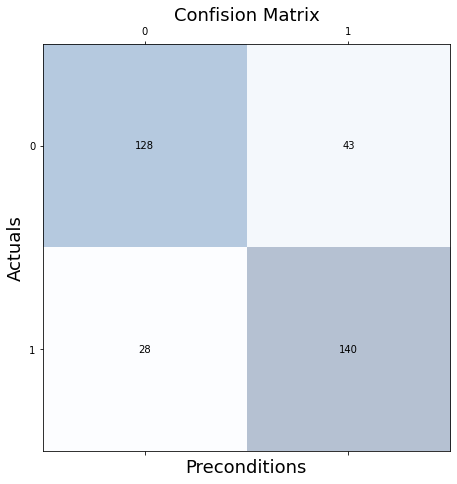

0.7905604719764012


In [32]:
# Visualizing results
y_pred = lr.predict(X_test)
plot_confusion_matrix(y_test, y_pred)
print(lr.score(X_test, y_test))

In [36]:
# Using data after MinMaxScaler
lr.fit(X_train_MinMaxScaled, y_train)

LogisticRegression(max_iter=1000)

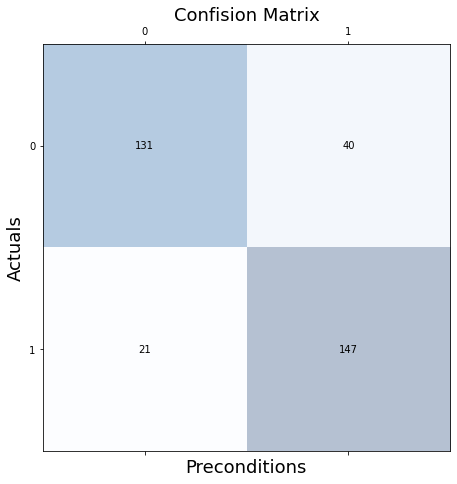

0.8200589970501475


In [37]:
# Visualizing results
y_pred = lr.predict(X_test_MinMaxScaled)
plot_confusion_matrix(X_test_MinMaxScaled, y_pred)
print(lr.score(X_test_MinMaxScaled, y_test))

In [38]:
# Using data after StandardScaler
lr.fit(X_train_StandardScaler, y_train)

LogisticRegression(max_iter=1000)

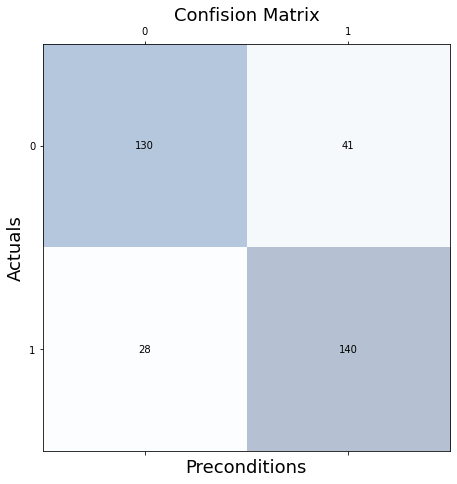

0.7964601769911505


In [39]:
# Visualizing results
y_pred = lr.predict(X_test_StandardScaler)
plot_confusion_matrix(X_test_StandardScaler, y_pred)
print(lr.score(X_test_StandardScaler, y_test))

In [43]:
# Using data after BoxCoxTransformer
lr.fit(X_train_BoxCox, y_train)

LogisticRegression(max_iter=1000)

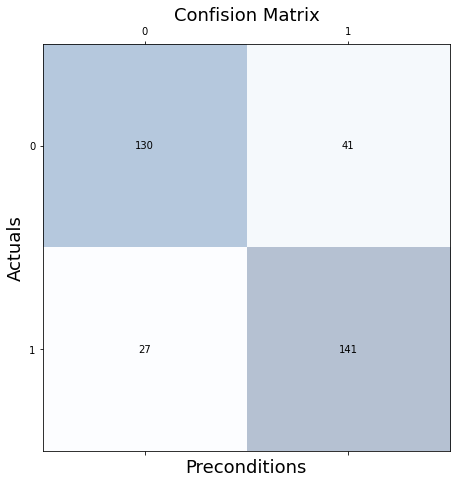

0.799410029498525


In [45]:
# Visualizing results
y_pred = lr.predict(X_test_BoxCox)
plot_confusion_matrix(X_test_BoxCox, y_pred)
print(lr.score(X_test_BoxCox, y_test))